In [91]:
import random
import numpy as np
import math

def generate_random_frequencies(n, p):
    m = 0
    for i in range(n):
        u_i = random.random()
        if u_i < p:
            m += 1
    return m


In [97]:
N_values = [10, 20, 50, 100, 200, 500, 1000]
n = [50, 100, 200]
p = 0.5

#data = {N: [generate_random_frequencies(N, p) for _ in range(n_value)] for N in n for n_value in N_values}
data = {N: [] for N in n}
for key, value in data.items():
    data[key].append(list([generate_random_frequencies(N, p) for _ in range(n_value)] for n_value in N_values))

data[50] = data[50][0]
data[100] = data[100][0]
data[200] = data[200][0]

In [105]:
seq = data[50][0]
seq

[513, 523, 480, 496, 531, 497, 495, 482, 505, 506]

In [110]:
def M_(seq):
    return sum(seq)/len(seq)

def D_(seq):
    n = len(seq) - 1
    M = M_practic(seq)
    var = sum((x - M) ** 2 for x in seq) / n 
    return var

def S_(D):
    return math.sqrt(D)

In [114]:
import numpy as np

def calculate_statistics(data):
    '''mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.sqrt(variance)'''
    mean = M_(data)
    variance = D_(data)
    std_dev = S_(variance)
    return mean, variance, std_dev

statistics = {N: [] for N in data}
for key, value in statistics.items():
    statistics[key].append(list(calculate_statistics(data[key][len(value)]) for n_value in N_values))

statics

TypeError: 'int' object is not iterable

In [76]:
def relative_frequencies(data, left, right, bins):
    hist, bin_edges = np.histogram(data, bins=bins, range=(left, right))
    relative_freq = hist / len(data)
    return relative_freq, bin_edges


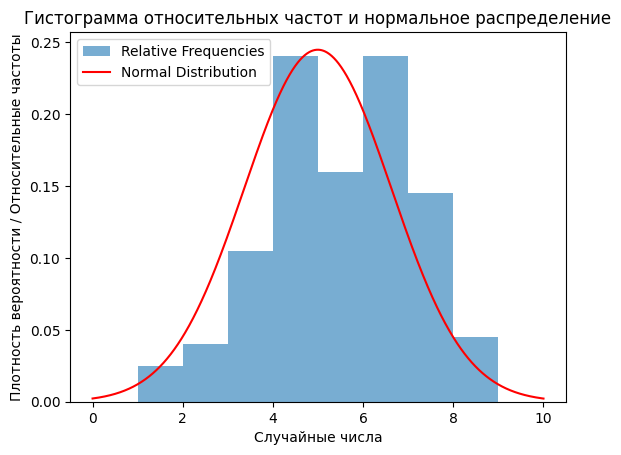

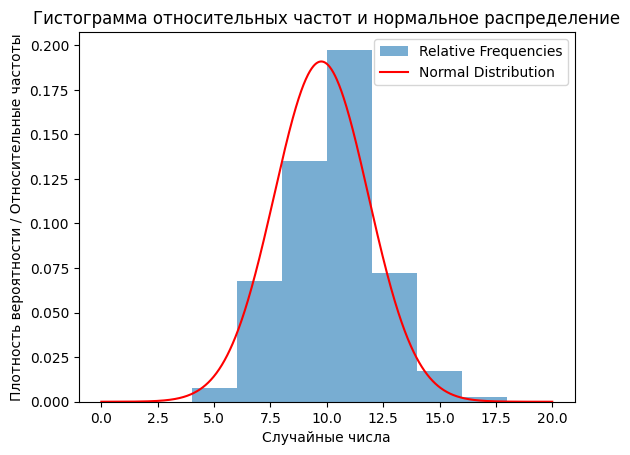

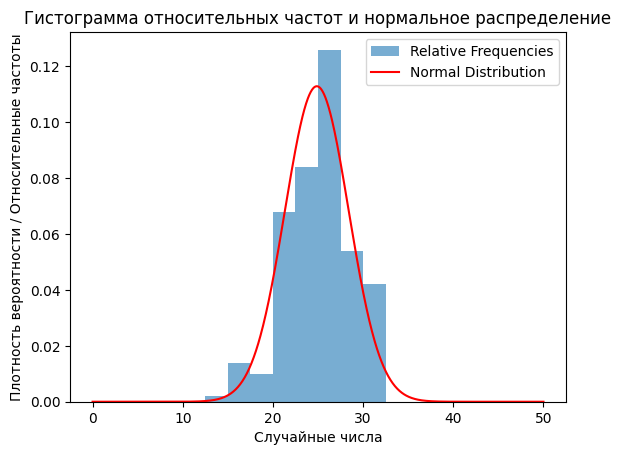

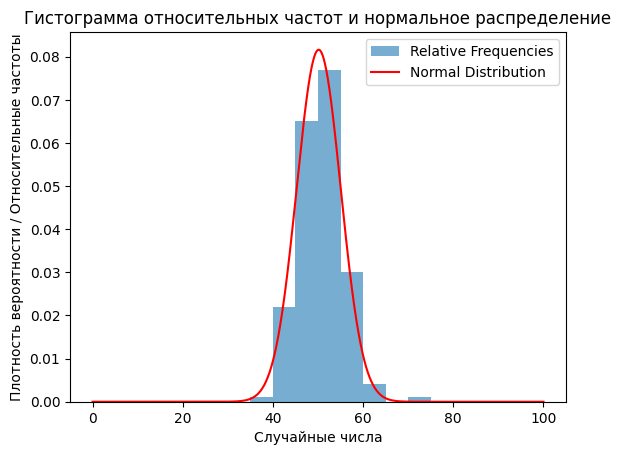

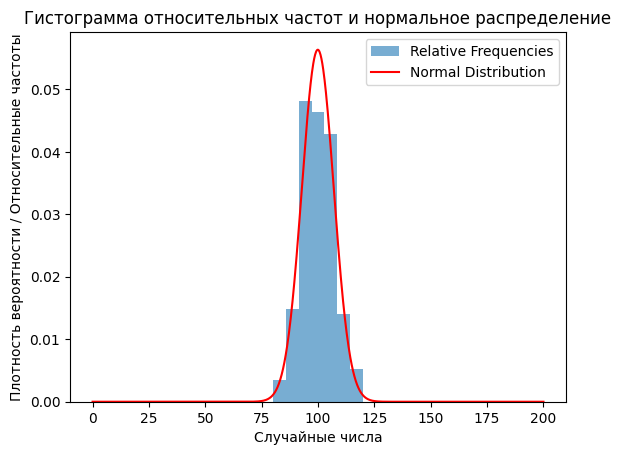

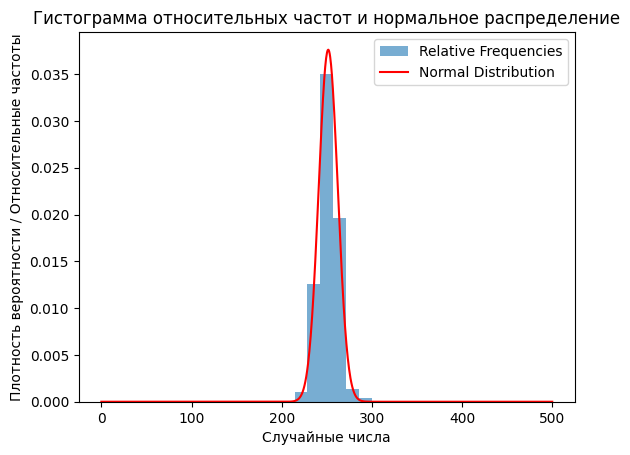

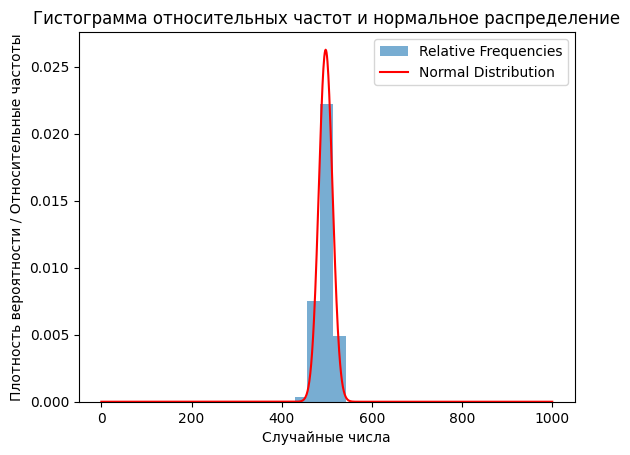

In [77]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_with_normal_distribution(data, bins, left, right, mean, std_dev):
    plt.hist(data, bins=bins+25, range=(left, right), density=True, alpha=0.6, label='Relative Frequencies')

    x_values = np.linspace(left, right, 1000)
    y_values = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values - mean) / std_dev) ** 2)

    plt.plot(x_values, y_values, label='Normal Distribution', color='r')

    plt.xlabel('Случайные числа')
    plt.ylabel('Плотность вероятности / Относительные частоты')
    plt.title('Гистограмма относительных частот и нормальное распределение')
    plt.legend()
    plt.show()

k = 0
for N in statistics:
    bins = 10
    k += 1
    mean, variance, std_dev = statistics[N]
    if k == 1 or k == 2:
        bins = -15
    elif k == 3 or k == 4:
        bins = -5
    plot_histogram_with_normal_distribution(data[N], bins=bins, left=0, right=N, mean=mean, std_dev=std_dev)
